In [154]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

SyntaxError: invalid syntax (1145020336.py, line 1)

# **read tha data**

In [ ]:
import wfdb
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [155]:
#to get the directory using id
os.chdir(r'/kaggle/input/chapmanshaoxing-12lead-ecg-database/WFDB_ChapmanShaoxing')

In [156]:
#get the hea file which contain the whole information about the patients
patient = os.listdir(r'/kaggle/input/chapmanshaoxing-12lead-ecg-database/WFDB_ChapmanShaoxing')
patient = list(filter(lambda x : x.split('.')[1] == 'hea',patient ))
df= pd.DataFrame(patient )

In [157]:
#function to get the labels from hea files which is on the 15th line named(dx)
def label_loading(directory):
    with open(directory, 'r') as f:
        lines = f.readlines()
        dx = lines[15].split()
        dx = dx[1].split(',')
        dx = list(map(lambda x : np.int32(x) , dx))
        return dx

In [158]:
df['diagnosis'] = df[0].apply(label_loading )

In [159]:
#there are alot of patients which have more than one disease so we get the patients who only have just one diseas
sub_df = df[df['diagnosis'].apply(len) == 1]

In [160]:
sub_df.loc[::,'diagnosis'] = sub_df.loc[::,'diagnosis'].apply(lambda x : x[0])

In [161]:
sub_df['diagnosis'].value_counts()

diagnosis
426177001    2202
426783006    1366
427084000     644
164889003     422
426761007     379
164890007      87
713422000      25
251166008       7
233897008       5
17366009        4
Name: count, dtype: int64

In [162]:
#it is afile named (information) attached with the reseaech paper which contaion the id and medical name of each id in the diagnosis column
label_table = pd.read_csv(r'/kaggle/input/information/ConditionNames_SNOMED-CT.csv')

In [163]:
#we choose the sb and sr as abnormal and normal because they have the maximum number of patients so it will give high accuracy
label_table[label_table['Snomed_CT'] == 426177001  ]

,Acronym Name,Full Name,Snomed_CT
52,SB,Sinus Bradycardia,426177001


In [164]:
label_table[label_table['Snomed_CT'] == 426783006  ]

,Acronym Name,Full Name,Snomed_CT
53,SR,Sinus Rhythm,426783006


In [165]:
our_data = sub_df[(sub_df['diagnosis'] == 426177001) | (sub_df['diagnosis'] == 426783006 )]

In [166]:
our_data

,0,diagnosis
1,JS04619.hea,426177001
2,JS01155.hea,426177001
9,JS04650.hea,426177001
10,JS05986.hea,426783006
14,JS04102.hea,426177001
...,...,...
10235,JS03704.hea,426177001
10236,JS01238.hea,426783006
10237,JS03216.hea,426783006
10241,JS00494.hea,426177001


In [167]:
#remove ".hea"
our_data.loc[::,0] = our_data.loc[::,0].apply(lambda x: x.split('.')[0])

In [168]:
our_data

,0,diagnosis
1,JS04619,426177001
2,JS01155,426177001
9,JS04650,426177001
10,JS05986,426783006
14,JS04102,426177001
...,...,...
10235,JS03704,426177001
10236,JS01238,426783006
10237,JS03216,426783006
10241,JS00494,426177001


In [169]:
#rename the columns
our_data.columns = ['directory' , 'diagnosis']

In [170]:
#get the ecg record using wfdb library
record = wfdb.rdrecord (our_data.iloc[0,0], sampfrom=0 , sampto=5000)

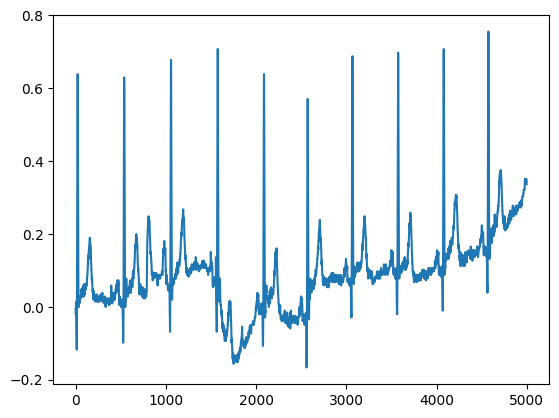

In [171]:
plt.plot(record.__dict__['p_signal'][::,0])

In [172]:
find_peaks(record.__dict__['p_signal'][::,0], distance=300)

(array([  21,  536, 1056, 1574, 2087, 2571, 3067, 3574, 4079, 4574, 4980]), {})

In [173]:
record.__dict__['p_signal'][0:5000,0]

array([-0.005, -0.02 ,  0.01 , ...,  0.346,  0.342,  0.337])

In [174]:
#record information(12 led ,sampling frequancy 500 ,numper of samples 5000 ,age ,sex ,id, ......)
record.__dict__

{'record_name': 'JS04619',
 'n_sig': 12,
 'fs': 500,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 5000,
 'base_time': datetime.time(0, 0, 24),
 'base_date': None,
 'comments': ['Age: 66',
  'Sex: Male',
  'Dx: 426177001',
  'Rx: Unknown',
  'Hx: Unknown',
  'Sx: Unknown'],
 'sig_name': ['I',
  'II',
  'III',
  'aVR',
  'aVL',
  'aVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'p_signal': array([[-0.005,  0.044,  0.049, ..., -0.107,  1.288,  0.02 ],
        [-0.02 ,  0.024,  0.044, ..., -0.117,  1.259,  0.02 ],
        [ 0.01 ,  0.078,  0.068, ..., -0.122,  1.259,  0.01 ],
        ...,
        [ 0.346,  0.429,  0.083, ..., -0.21 , -0.176, -0.029],
        [ 0.342,  0.429,  0.088, ..., -0.205, -0.176, -0.029],
        [ 0.337,  0.429,  0.093, ..., -0.2  , -0.176, -0.029]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['JS04619.mat',
  'JS04619.mat',
  'JS04619.mat',
  'JS04619.mat',
  'JS04619.mat',
  'JS04619.mat',
  'JS04619.mat',
  '

In [175]:
#detect qrs(peaks)
from wfdb import processing
processing.qrs.gqrs_detect(record.__dict__['p_signal'][::,0],500)

array([ 521, 1040, 1557, 2071, 2555, 3051, 3558, 4063])

In [176]:
#variable contain p_signal(array have the values)
ecg=record.__dict__['p_signal'][:,0]

In [177]:
#5000 sample taken from 12 lead
print(record.__dict__['p_signal'].shape)

(5000, 12)


In [178]:
arr = record.__dict__['p_signal'][::,0]

In [179]:
#search for any non values
(arr == np.nan).sum()


0

In [180]:
#number of peaks
len(processing.gqrs_detect(record.__dict__['p_signal'][::,0],500))

8

In [181]:
our_data

,directory,diagnosis
1,JS04619,426177001
2,JS01155,426177001
9,JS04650,426177001
10,JS05986,426783006
14,JS04102,426177001
...,...,...
10235,JS03704,426177001
10236,JS01238,426783006
10237,JS03216,426783006
10241,JS00494,426177001


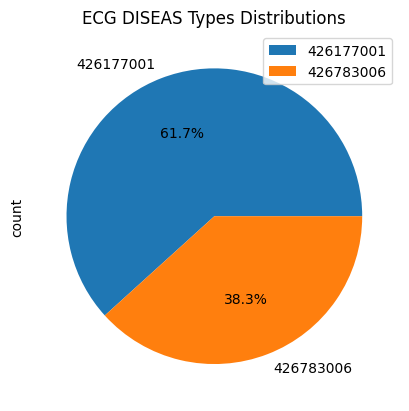

In [182]:
#show the percentage of our data
our_data['diagnosis'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("ECG DISEAS Types Distributions")
plt.legend()
plt.show()

In [183]:

our_data = our_data.replace(426177001, 'SB')
our_data = our_data.replace(426783006, 'SR')


In [184]:
our_data

,directory,diagnosis
1,JS04619,SB
2,JS01155,SB
9,JS04650,SB
10,JS05986,SR
14,JS04102,SB
...,...,...
10235,JS03704,SB
10236,JS01238,SR
10237,JS03216,SR
10241,JS00494,SB


In [185]:
#remove some samples of our data to avoid overfitting and store the new data in kaggle/working/dataset.csv
count = 0
with open('/kaggle/working/dataset.csv', 'w') as f:
    with open('/kaggle/input/dataset2/imp (1).csv', 'r') as g:
        for line in g:
            if count < 1000 and 'SB' in line:
                count += 1
            else:
                f.write(line)

In [186]:
ecg_data=pd.read_csv(r'/kaggle/working/dataset.csv')

# ****our preprocessed data****

In [187]:
ecg_data

,Unnamed: 0,directory,diagnosis
0,3,JS05986,SR
1,6,JS00457,SR
2,9,JS03640,SR
3,11,JS04097,SR
4,12,JS05079,SR
...,...,...,...
2563,3563,JS03704,SB
2564,3564,JS01238,SR
2565,3565,JS03216,SR
2566,3566,JS00494,SB


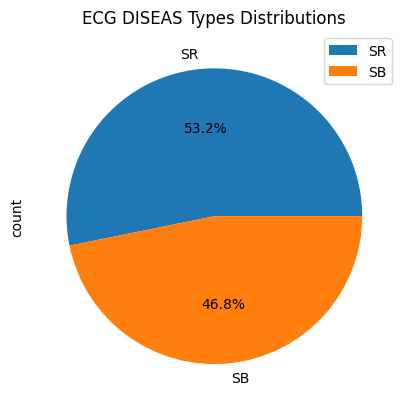

In [188]:
ecg_data['diagnosis'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.title("ECG DISEAS Types Distributions")
plt.legend()
plt.show()

In [189]:
#get the p_signal of each patient and store it in (data)
import wfdb
data=[]
for i in range(ecg_data.shape[0]):
    record_name = ecg_data.iloc[i, 1]
    record = wfdb.rdrecord(record_name, sampfrom=0, sampto=5000)
    signals = record.p_signal
    data.append(signals)
    # Do something with the signals here

In [190]:
data[0]

array([[ 0.034, -0.02 , -0.054, ...,  0.015, -0.054, -0.049],
       [ 0.01 , -0.034, -0.044, ...,  0.015, -0.054, -0.054],
       [ 0.044,  0.01 , -0.034, ...,  0.024, -0.039, -0.044],
       ...,
       [ 0.039,  0.039,  0.   , ...,  0.102,  0.044,  0.068],
       [ 0.034,  0.044,  0.01 , ...,  0.112,  0.059,  0.078],
       [ 0.01 ,  0.015,  0.005, ...,  0.102,  0.054,  0.073]])

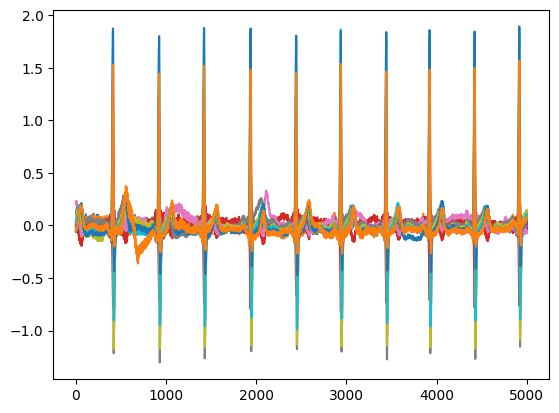

In [191]:
plt.plot(data[0])

In [192]:
len(data)

2568

In [193]:
#load labels
import os
import pandas as pd
import numpy as np
import glob
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
import wfdb
ecg_data = pd.read_csv('/kaggle/working/dataset.csv')

patient_labels = []

# Loop through each patient directory
for index, row in ecg_data.iterrows():
    diag = row['diagnosis']
    id = row['directory']

    patient_labels.append(diag)

# Convert the lists to numpy arrays
data = np.array(data)
patient_labels = np.array(patient_labels)


In [194]:
len(patient_labels)

2568

In [195]:
len(data)

2568

In [196]:
#convert text to integer (encoding)
ecg_label_1 = []
for i in patient_labels:
    if i=="SB":
        ecg_label_1.append(1)
    elif i=="SR":
        ecg_label_1.append(0)


In [197]:
#convert data and labels to array praparing it for the model
x = np.array(data)
y = np.array(ecg_label_1)

In [198]:
#splitting the data to train and test
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 5000, 12)
(771, 5000, 12)
(1797,)
(771,)


In [199]:
x_train.shape[0]

1797

# > ***our cnn model in time domain***

In [209]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, LeakyReLU, MaxPooling2D, \
GlobalAveragePooling1D, Dense, Dropout, AveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.layers import Flatten

model = Sequential()
model.add(Conv2D(128, (3, 3), strides=(3, 3), padding='same', input_shape=(5000, 12, 1),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(70, (3, 3), strides=(3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(60, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(3, 3), padding='same'))   
model.add(Conv2D(50, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(40, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(50, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(60, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(units=600,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=500,activation='relu'))   
model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)              │ (None, 1667, 4, 128)   │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_56          │ (None, 1667, 4, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 556, 2, 70)     │        80,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_57          │ (None, 556, 2, 70)     │           280 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 556, 2, 60)     │        37,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 186, 1, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 186, 1, 50)     │        27,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_58          │ (None, 186, 1, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 186, 1, 40)     │        18,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 186, 1, 50)     │        18,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_59          │ (None, 186, 1, 50)     │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_84 (Conv2D)              │ (None, 186, 1, 60)     │        27,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 93, 1, 60)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 93, 1, 64)      │        34,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_60          │ (None, 93, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 93, 1, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_61          │ (None, 93, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 47, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_87 (Conv2D)              │ (None, 47, 1, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_62          │ (None, 47, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_88 (Conv2D)              │ (None, 47, 1, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,986,526 (7.58 MB)

 Trainable params: 1,985,418 (7.57 MB)

 Non-trainable params: 1,108 (4.33 KB)

In [210]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the directory where you want to save the model
model_dir = os.path.join(os.path.expanduser('~'), 'my_models')

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Define the file path for the model checkpoint
model_filepath = os.path.join(model_dir, 'best_model.keras')

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Define the model checkpoint callback
model_checkpoint = ModelCheckpoint(model_filepath, save_best_only=True)

# Train the model with the callbacks
history = model.fit(x_train, y_train, epochs=10, batch_size=16,
                    #callbacks=[early_stopping, model_checkpoint],
                    validation_data=(x_test, y_test))

Epoch 1/10
 13/113 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6192 - loss: 0.6839

W0000 00:00:1716144268.410546     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.7963 - loss: 0.4318

W0000 00:00:1716144280.247539     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


113/113 ━━━━━━━━━━━━━━━━━━━━ 55s 113ms/step - accuracy: 0.7971 - loss: 0.4303 - val_accuracy: 0.4721 - val_loss: 0.9155
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9669 - loss: 0.0953 - val_accuracy: 0.4721 - val_loss: 3.5400
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9781 - loss: 0.1100 - val_accuracy: 0.4721 - val_loss: 5.6617
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9832 - loss: 0.0519 - val_accuracy: 0.8470 - val_loss: 0.3265
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9838 - loss: 0.0535 - val_accuracy: 0.9857 - val_loss: 0.0553
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9893 - loss: 0.0260 - val_accuracy: 0.9857 - val_loss: 0.0714
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9954 - loss: 0.0191 - val_accuracy: 0.9780 - val_loss: 0.0681
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9820 - loss: 0.0638 - val_accuracy: 0.9

In [211]:
ModelLoss, ModelAccuracy = model.evaluate(x_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9923 - loss: 0.0477 
Test Loss is 0.1325867623090744
Test Accuracy is 0.9870298504829407


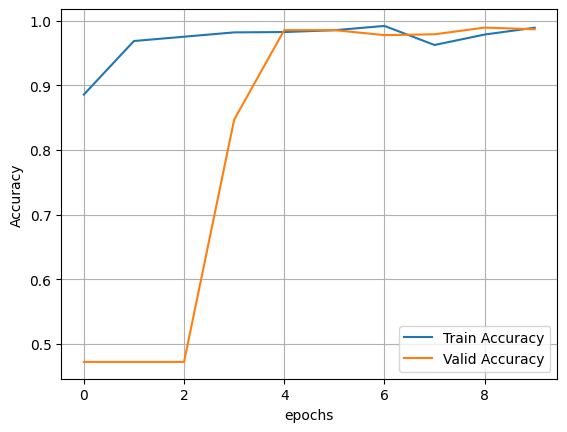

In [212]:
import pandas as pd

history_df = pd.DataFrame(history.history)

plt.plot( range(history_df.shape[0]), history_df["accuracy"].values, label="Train Accuracy")
plt.plot( range(history_df.shape[0]), history_df["val_accuracy"].values, label="Valid Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

In [213]:
y_pred = model.predict(x_test)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:10]  ## Predicted Labels

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step


[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

In [214]:
y_test[:10]  ## Actual Labels

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

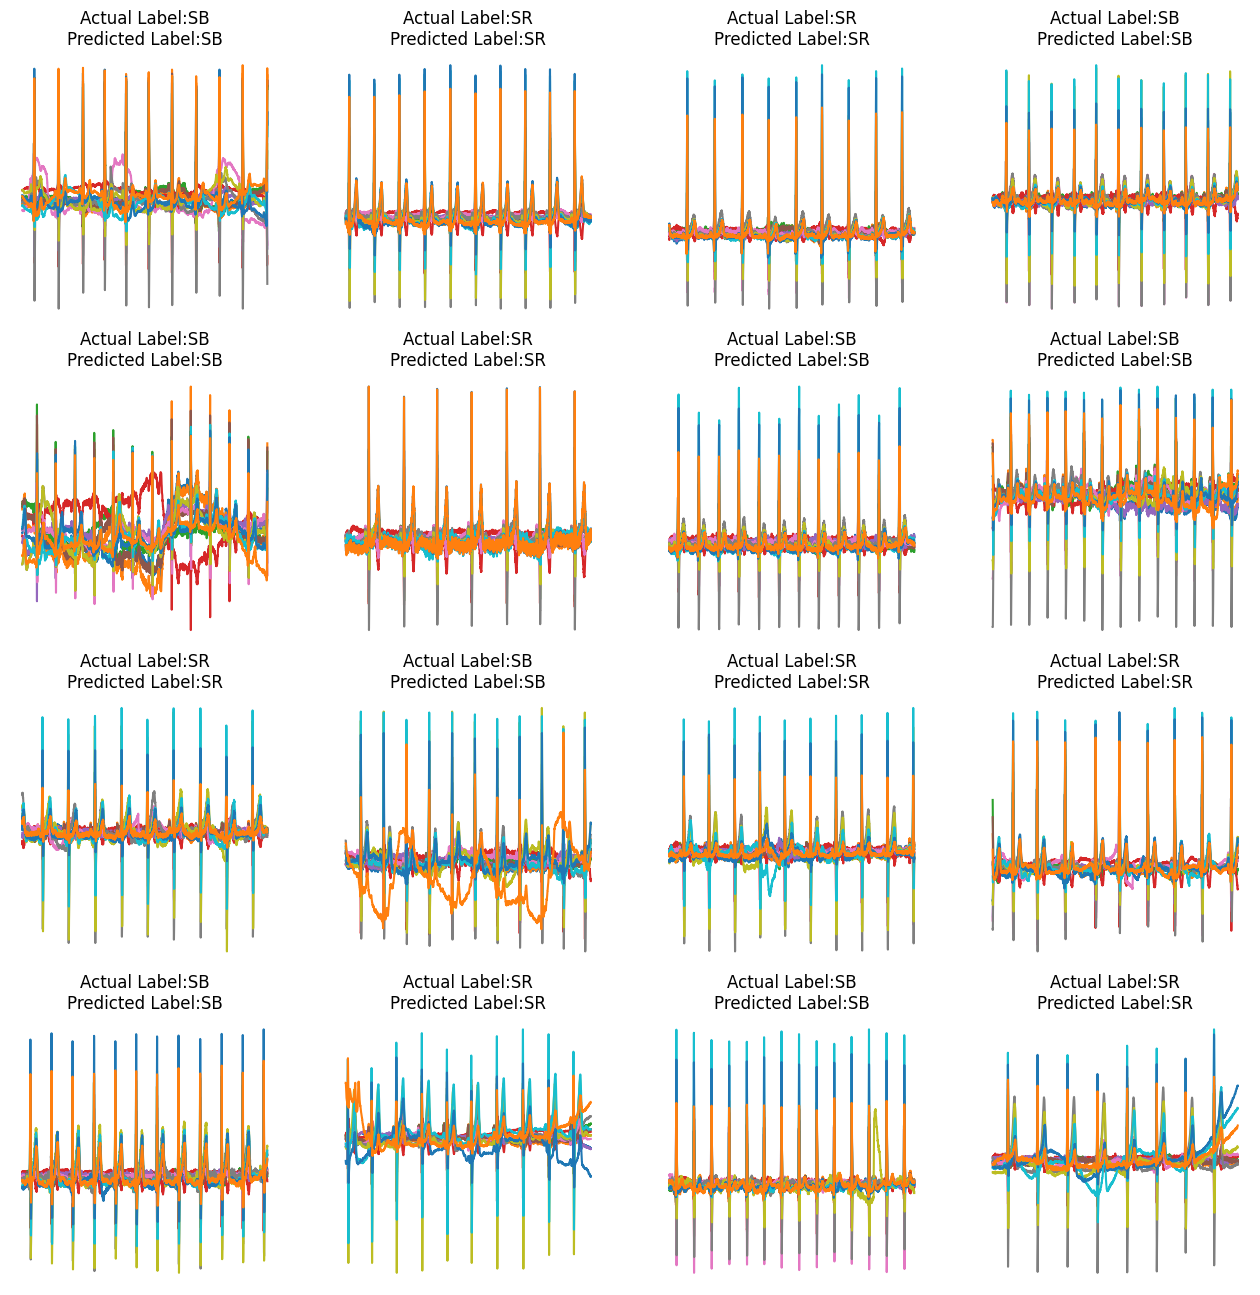

In [215]:
class_labels = ['SB', 'SR']
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.plot(x_test[i])
    plt.title(f"Actual Label:{class_labels[y_test[i]]}\nPredicted Label:{class_labels[y_pred_label[i]]}")
    plt.axis("off")

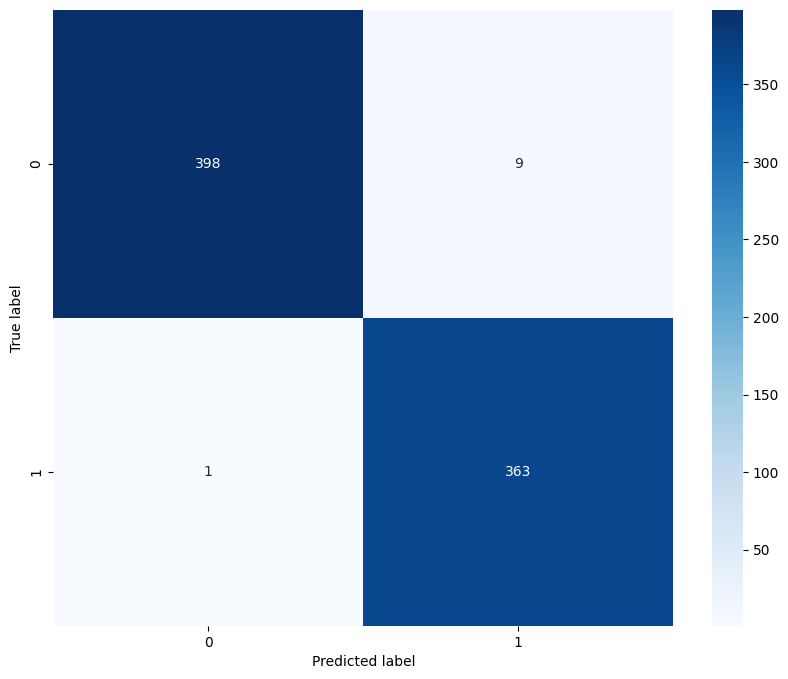

In [216]:
# Compute the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_label)
# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [217]:
TP=363
TN=398
FP=1
FN=9
N=FP+TN
P=FN+TP

In [218]:
Sensitivity =TP/(TP + FN)
Sensitivity

0.9758064516129032

In [219]:
Specificity =TN/(TN + FP)
Specificity

0.9974937343358395

In [220]:
FP_rate =FP/N
TP_rate =TP/P


In [221]:
Precision =TP/(TP+FP)

In [222]:
F1 = 2 *((Precision * TP_rate)/(Precision+ TP_rate))
F1

0.9864130434782609

In [223]:
Accuracy =(TP + TN)/(P + N)
Accuracy    

0.9870298313878081

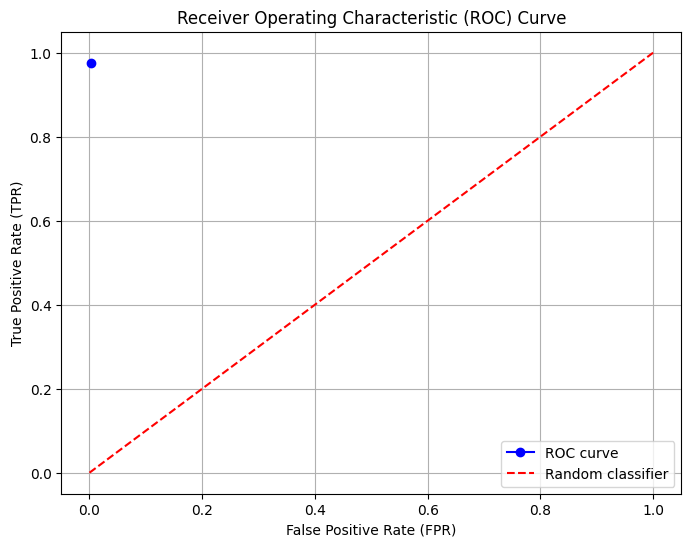

In [224]:
import matplotlib.pyplot as plt

# Sample data
tpr =TP_rate  # True Positive Rate
fpr =FP_rate  # False Positive Rate

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b', label='ROC curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random classifier')

# Plot annotations
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [225]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       407
           1       0.98      1.00      0.99       364

    accuracy                           0.99       771
   macro avg       0.99      0.99      0.99       771
weighted avg       0.99      0.99      0.99       771



# cnn model in frequency domain

In [226]:
import wfdb
import numpy as np

dataf = []
for i in range(ecg_data.shape[0]):
    record_name = ecg_data.iloc[i, 1]
    record = wfdb.rdrecord(record_name, sampfrom=0, sampto=5000)
    signals = record.p_signal
    dataf.append(np.fft.fft(signals).real)

In [228]:
x = np.array(dataf)
y = np.array(ecg_label_1)

In [229]:
x_trainf , x_testf, y_trainf, y_testf = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1797, 5000, 12)
(771, 5000, 12)
(1797,)
(771,)


In [230]:
model = Sequential()
model.add(Conv2D(128, (3, 3), strides=(3, 3), padding='same', input_shape=(5000, 12, 1),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(70, (3, 3), strides=(3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(60, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(3, 3), padding='same'))   
model.add(Conv2D(50, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(40, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(50, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(60, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
model.add(Flatten())
model.add(Dense(units=600,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=500,activation='relu'))   
model.add(Dense(units=400,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=300,activation='relu'))
model.add(Dense(units=200,activation='relu'))
model.add(Dense(units=100,activation='relu'))
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=2,activation='softmax'))

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [231]:
epochs =10
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define the early stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Define the model checkpoint callback
#model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model with the callbacks
history = model.fit(x_trainf, y_trainf, epochs=epochs, batch_size=16,
                    #callbacks=[early_stopping, model_checkpoint],
                    validation_data=(x_testf, y_testf))

Epoch 1/10
 13/113 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5133 - loss: 0.7573

W0000 00:00:1716144484.653969     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7282 - loss: 0.4827

W0000 00:00:1716144497.935397     110 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


113/113 ━━━━━━━━━━━━━━━━━━━━ 57s 126ms/step - accuracy: 0.7294 - loss: 0.4808 - val_accuracy: 0.4721 - val_loss: 1.0105
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9689 - loss: 0.0980 - val_accuracy: 0.4721 - val_loss: 2.7140
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9665 - loss: 0.0964 - val_accuracy: 0.4838 - val_loss: 4.4324
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9881 - loss: 0.0393 - val_accuracy: 0.9442 - val_loss: 0.3465
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9857 - loss: 0.0543 - val_accuracy: 0.9805 - val_loss: 0.0533
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9757 - loss: 0.0952 - val_accuracy: 0.9818 - val_loss: 0.0468
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9870 - loss: 0.0469 - val_accuracy: 0.9650 - val_loss: 0.2351
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9745 - loss: 0.0925 - val_accuracy: 0.9

In [232]:
ModelLoss, ModelAccuracy = model.evaluate(x_testf, y_testf)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9903 - loss: 0.0240
Test Loss is 0.04770854488015175
Test Accuracy is 0.9805447459220886


In [233]:
y_pred = model.predict(x_testf)
y_pred_label = [np.argmax(i) for i in y_pred]
y_pred_label[:10]  ## Predicted Labels

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


[0, 1, 1, 0, 0, 1, 0, 0, 1, 0]

In [234]:
y_testf[:10]  ## Actual Labels

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

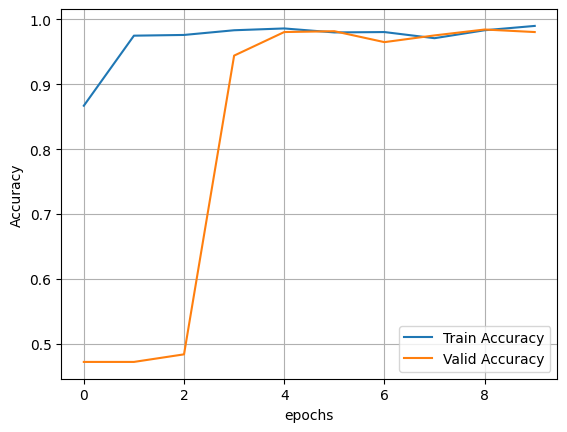

In [235]:
import pandas as pd

history_df = pd.DataFrame(history.history)

plt.plot( range(history_df.shape[0]), history_df["accuracy"].values, label="Train Accuracy")
plt.plot( range(history_df.shape[0]), history_df["val_accuracy"].values, label="Valid Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.grid()
plt.legend()
plt.show()

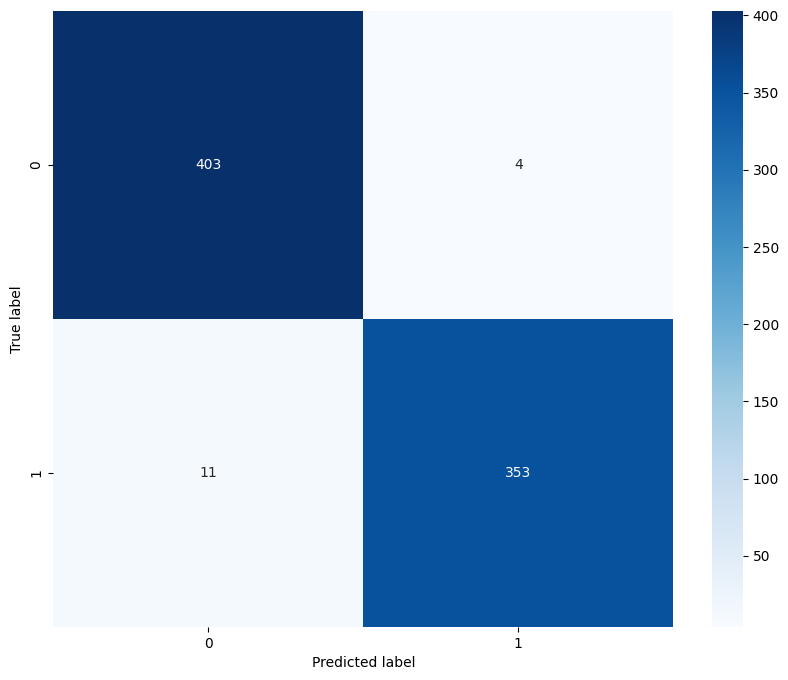

In [236]:
# Compute the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_testf, y_pred_label)
# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [238]:
TP=353
TN=403
FP=11
FN=4
N=FP+TN
P=FN+TP

In [239]:
Sensitivity2 =TP/(TP + FN)
Sensitivity2

0.988795518207283

In [240]:
Specificity2 =TN/(TN + FP)
Specificity2

0.9734299516908212

In [241]:
FP_rate2 =FP/N
TP_rate2 =TP/P

In [242]:
Precision2=TP/(TP+FP)

In [243]:
F2 = 2 *((Precision * TP_rate)/(Precision+ TP_rate))
F2

0.9864130434782609

In [244]:
Accuracy =(TP + TN)/(P + N)
Accuracy   

0.980544747081712

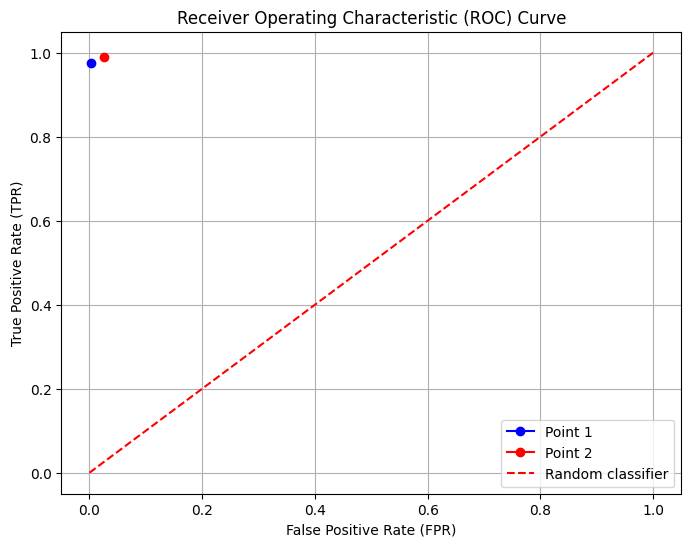

In [245]:
import matplotlib.pyplot as plt

# Sample data
tpr1 = TP_rate
fpr1 = FP_rate
tpr2 = TP_rate2
fpr2 = FP_rate2

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, marker='o', linestyle='-', color='b', label='Point 1')
plt.plot(fpr2, tpr2, marker='o', linestyle='-', color='r', label='Point 2')
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random classifier')

# Plot annotations
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()



In [246]:
from sklearn.metrics import classification_report
print(classification_report(y_testf, y_pred_label))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       407
           1       0.99      0.97      0.98       364

    accuracy                           0.98       771
   macro avg       0.98      0.98      0.98       771
weighted avg       0.98      0.98      0.98       771



# our LSTM model in time domain

In [250]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, BatchNormalization, Reshape
from tensorflow.keras.layers import Bidirectional

# Reshape input data to add time dimension
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

# Define the RNN model
model = Sequential()
model.add(Conv2D(128, (3, 3), strides=(3, 3), padding='same', input_shape=(x_train.shape[1], x_train.shape[2], 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(70, (3, 3), strides=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(60, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3), strides=(3, 3), padding='same'))
model.add(Flatten())  # Flatten the output of the convolutional layers
model.add(Reshape((60, -1)))  # Reshape to match the input shape of the LSTM layer

# Here we should specify the return sequences as True to return the whole sequence rather than the last output
model.add(Bidirectional(LSTM(1024, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(512, activation='tanh', return_sequences=True)))
model.add(Bidirectional(LSTM(265, activation='tanh', return_sequences=False)))  # Since this is the last LSTM layer, return_sequences should be False

model.add(Dense(265, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # Change output layer to have 1 neuron and sigmoid activation
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(loss, accuracy))



Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 17s 160ms/step - accuracy: 0.5231 - loss: 0.6922 - val_accuracy: 0.4721 - val_loss: 0.6991
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.5551 - loss: 0.6670 - val_accuracy: 0.4721 - val_loss: 0.7836
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.8330 - loss: 0.4292 - val_accuracy: 0.4721 - val_loss: 1.8797
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9249 - loss: 0.2258 - val_accuracy: 0.4721 - val_loss: 1.9571
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9368 - loss: 0.1831 - val_accuracy: 0.5499 - val_loss: 1.9697
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9626 - loss: 0.1209 - val_accuracy: 0.6057 - val_loss: 1.5605
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.9606 - loss: 0.1390 - val_accuracy: 0.6654 - val_loss: 1.0675
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - accuracy: 0.9720 - loss: 0.0921 - val_accuracy: 0

In [251]:
y_pred = model.predict(x_test)
y_pred_label = y_pred
y_pred_label[:10]  ## Predicted Labels

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


array([[8.4032974e-05],
       [9.8575979e-01],
       [9.9992359e-01],
       [4.6812474e-07],
       [1.0832588e-06],
       [9.9975878e-01],
       [1.2619397e-07],
       [4.2091528e-07],
       [9.9974853e-01],
       [4.9620780e-07]], dtype=float32)

In [252]:
y_pred = model.predict(x_test)
y_pred_label = np.where(y_pred >= 0.5, 1, 0) # Convert continuous predictions to categorical labels
y_pred_label[:10]

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


array([[0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]])

In [254]:
y_test[:10]  ## Actual Labels

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

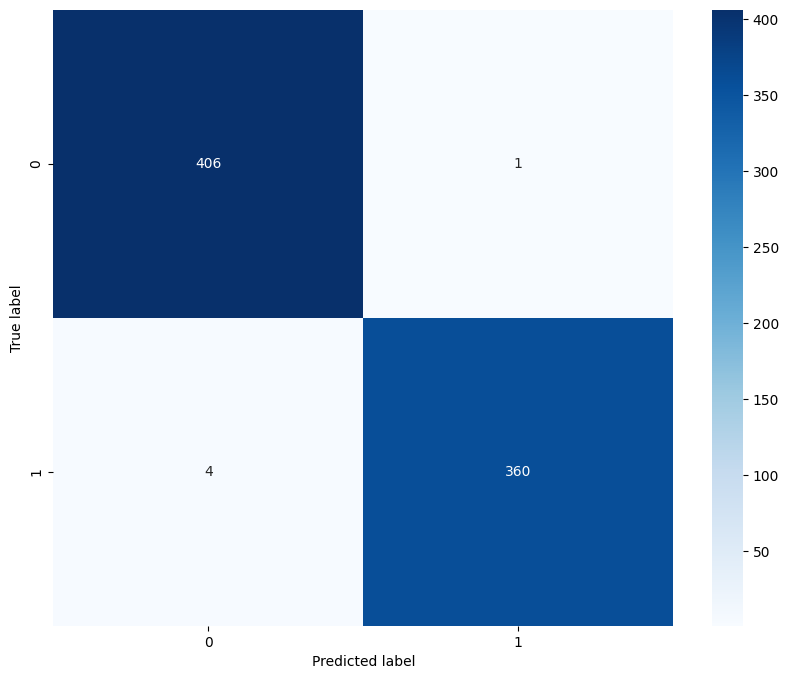

In [255]:
# Compute the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_label)
# Plot the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [257]:
TP=360
TN=406
FP=4
FN=1
N=FP+TN
P=FN+TP

In [258]:
Sensitivity3 =TP/(TP + FN)
Sensitivity3

0.997229916897507

In [259]:
Specificity3 =TN/(TN + FP)
Specificity3

0.9902439024390244

In [260]:
FP_rate3 =FP/N
TP_rate3 =TP/P

In [261]:
Precision3=TP/(TP+FP)

In [262]:
F3 = 2 *((Precision * TP_rate)/(Precision+ TP_rate))
F3

0.9864130434782609

In [263]:
Accuracy3 =(TP + TN)/(P + N)
Accuracy3

0.993514915693904

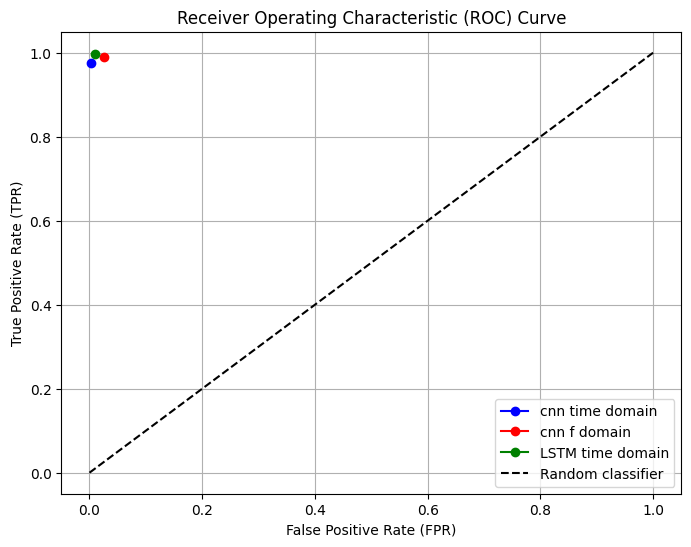

In [266]:
import matplotlib.pyplot as plt

# Sample data
tpr1 = TP_rate
fpr1 = FP_rate
tpr2 = TP_rate2
fpr2 = FP_rate2
tpr3 = TP_rate3
fpr3 = FP_rate3

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, marker='o', linestyle='-', color='b', label='cnn time domain')
plt.plot(fpr2, tpr2, marker='o', linestyle='-', color='r', label='cnn f domain')
plt.plot(fpr3, tpr3, marker='o', linestyle='-', color='g', label='LSTM time domain')
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random classifier')  # Plot random classifier line for all points

# Plot annotations
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [265]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_label))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       407
           1       1.00      0.99      0.99       364

    accuracy                           0.99       771
   macro avg       0.99      0.99      0.99       771
weighted avg       0.99      0.99      0.99       771



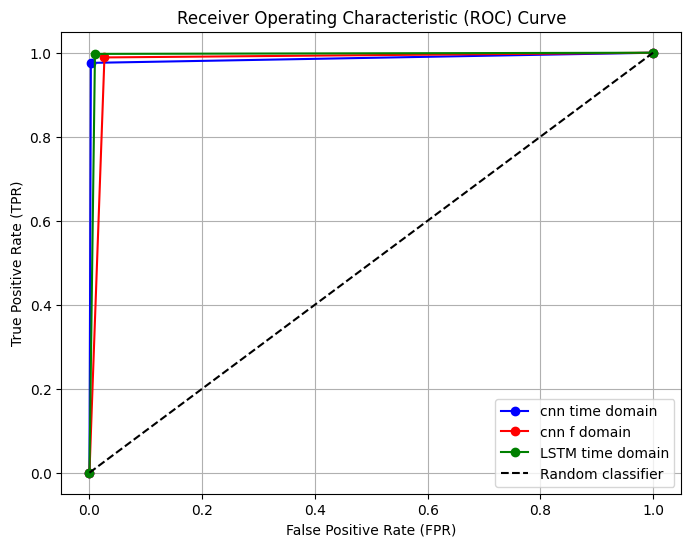

In [271]:
import matplotlib.pyplot as plt

# Sample data
tpr1 = [0, TP_rate , 1.0]  # Replace with your actual data
fpr1 = [0.0,FP_rate, 1.0]  # Replace with your actual data
tpr2 = [0,TP_rate2 , 1.0]  # Replace with your actual data
fpr2 = [0.0,FP_rate2 , 1.0]  # Replace with your actual data
tpr3 = [0, TP_rate3, 1.0]  # Replace with your actual data
fpr3 = [0.0, FP_rate3, 1.0]  # Replace with your actual data

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, marker='o', linestyle='-', color='b', label='cnn time domain')
plt.plot(fpr2, tpr2, marker='o', linestyle='-', color='r', label='cnn f domain')
plt.plot(fpr3, tpr3, marker='o', linestyle='-', color='g', label='LSTM time domain')
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='Random classifier')  # Plot random classifier line for all points

# Plot annotations
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [273]:
def calculate_auc(fpr, tpr):
    auc = 0
    for i in range(len(fpr1) - 1):
        auc += (fpr1[i + 1] - fpr1[i]) * (tpr1[i] + tpr1[i + 1]) / 2
    return auc

# Example usage

auc = calculate_auc(fpr, tpr)
print(f"AUC: {auc}")

AUC: 0.9866500929743716


In [274]:
def calculate_auc(fpr, tpr):
    auc = 0
    for i in range(len(fpr2) - 1):
        auc += (fpr2[i + 1] - fpr2[i]) * (tpr2[i] + tpr2[i + 1]) / 2
    return auc

auc = calculate_auc(fpr, tpr)
print(f"AUC: {auc}")

AUC: 0.981112734949052


In [275]:
def calculate_auc(fpr, tpr):
    auc = 0
    for i in range(len(fpr3) - 1):
        auc += (fpr3[i + 1] - fpr3[i]) * (tpr3[i] + tpr3[i + 1]) / 2
    return auc

auc = calculate_auc(fpr, tpr)
print(f"AUC: {auc}")

AUC: 0.9937369096682657
